In [65]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 15

### The Monty Hall Problem ###

In [66]:
goats = make_array('first goat', 'second goat')
doors = np.append(goats, 'car')
doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [67]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [68]:
[other_goat('first goat'), other_goat('second goat')]

['second goat', 'first goat']

In [69]:
def monty_hall():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_choice = 'car'
    
    if contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_choice = 'car'
    
    if contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_choice = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_choice]

In [70]:
monty_hall()

['second goat', 'first goat', 'car']

In [71]:
results = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    results.append(monty_hall())


In [72]:
results.show(3)

Guess,Revealed,Remaining
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car


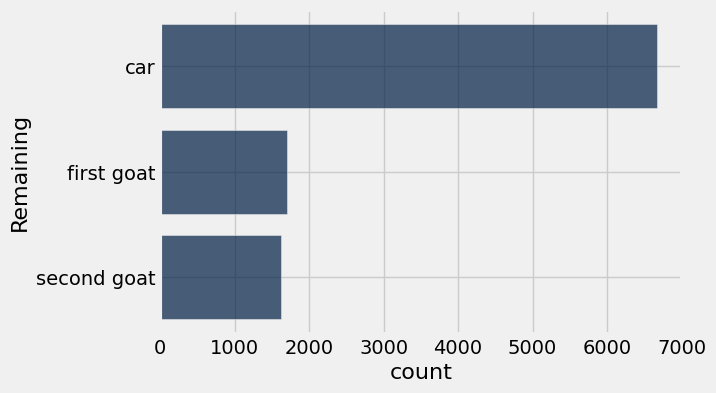

In [73]:
results.group('Remaining').barh('Remaining')

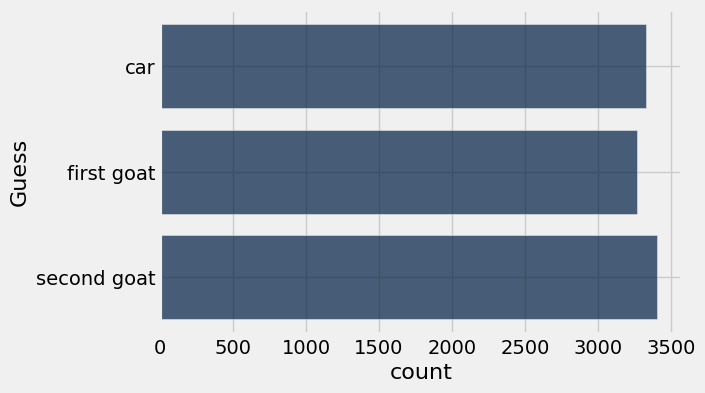

In [74]:
results.group('Guess').barh('Guess')

In [75]:
original_choice = results.group('Guess')
original_choice

Guess,count
car,3328
first goat,3266
second goat,3406


In [76]:
remaining_door = results.group('Remaining')
remaining_door

Remaining,count
car,6672
first goat,1705
second goat,1623


In [77]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3328,6672
first goat,3266,1705
second goat,3406,1623


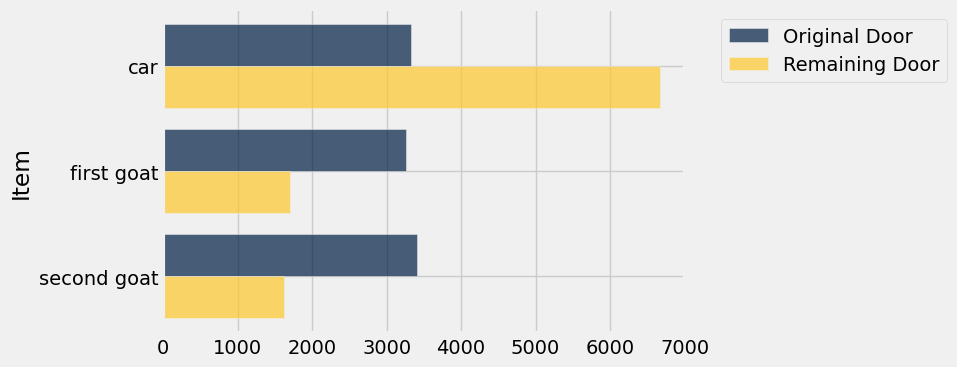

In [78]:
combined.barh(0)

## Random Sampling ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination and how long they were delayed, in minutes.

In [79]:
# united = Table.read_table('../../data/united.csv')
united = Table.read_table('../../data/united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


Some deterministic samples:

In [80]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


In [81]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [82]:
united.take(make_array(34, 6321, 10040))

Row,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


A random sample:

In [83]:
start = np.random.choice(np.arange(1000))
# print(start)
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
569,6/4/15,1686,DCA,26
1569,6/11/15,1076,LAX,2
2569,6/18/15,318,DEN,12
3569,6/24/15,1635,DEN,6
4569,7/1/15,1111,EWR,2
5569,7/8/15,1120,IAH,38
6569,7/15/15,237,STL,0
7569,7/21/15,1438,EWR,0
8569,7/28/15,394,LAS,2
9569,8/3/15,1526,SEA,14


## Distributions ##

In [84]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [85]:
die.sample(10)

Face
6
1
1
5
1
3
5
2
6
4


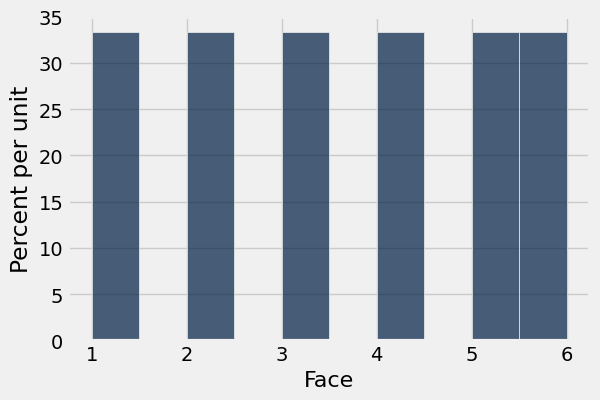

In [86]:
die.hist()

In [87]:
roll_bins = np.arange(0.5, 6.6, 1)

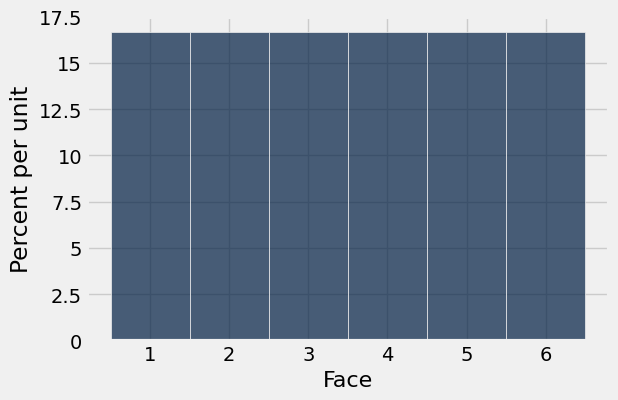

In [88]:
die.hist(bins=roll_bins)

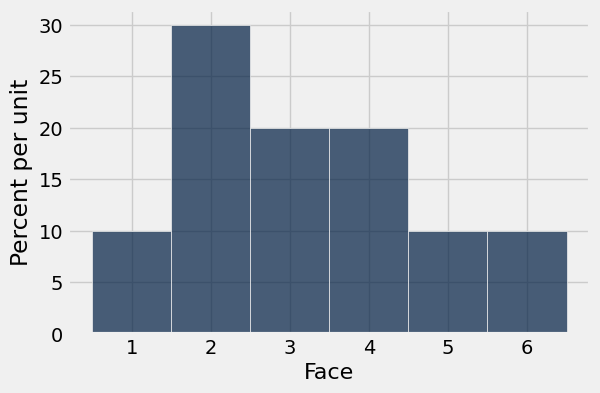

In [89]:
die.sample(10).hist(bins=roll_bins)

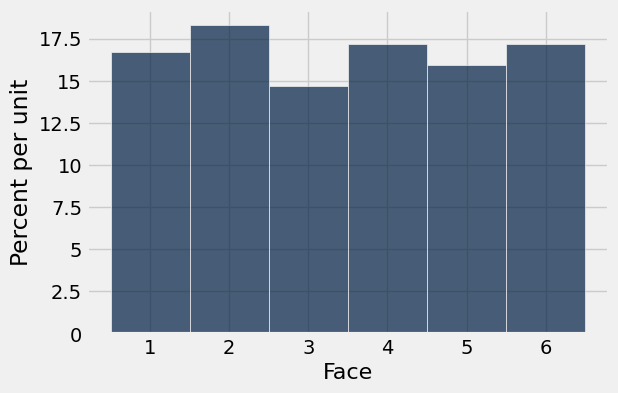

In [90]:
die.sample(1000).hist(bins=roll_bins)

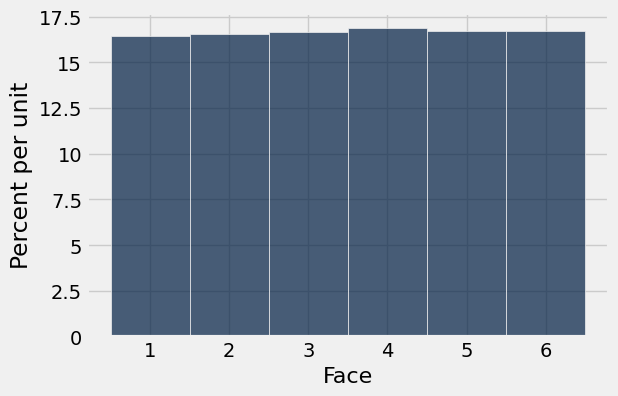

In [91]:
die.sample(100000).hist(bins=roll_bins)

## Large Random Samples ##

In [92]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


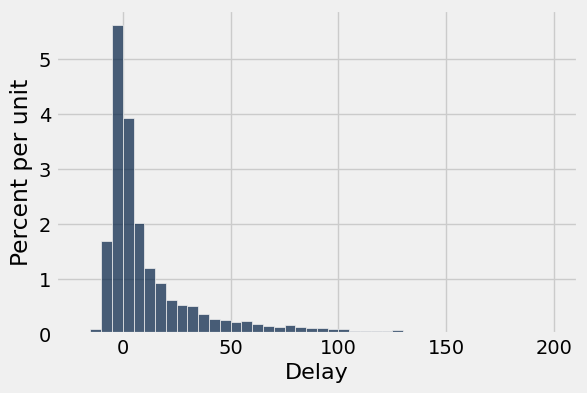

In [93]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [94]:
min(united.column('Delay'))

-16

In [95]:
max(united.column('Delay'))

580

In [96]:
np.average(united.column('Delay'))

16.658155515370705

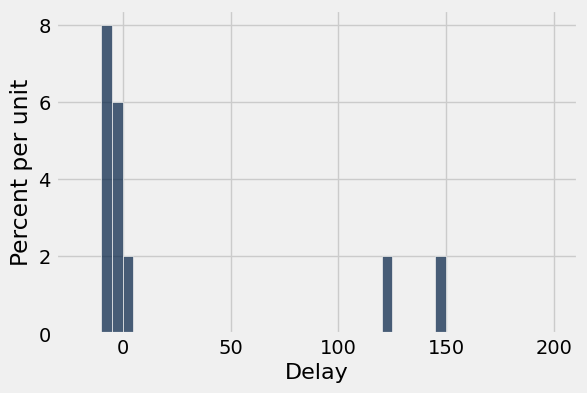

In [97]:
united.sample(10).hist('Delay', bins = united_bins)

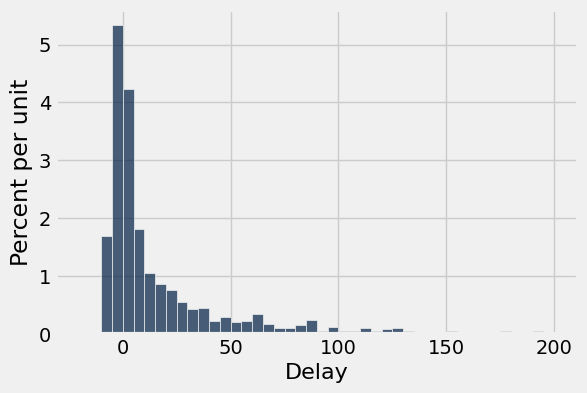

In [98]:
united.sample(1000).hist('Delay', bins = united_bins)

## Simulating Statistics ##

In [99]:
np.median(united.column('Delay'))

2.0

In [100]:
united.sample?

Signature: united.sample(k=None, with_replacement=True, weights=None)
Docstring:
Return a new table where k rows are randomly sampled from the
original table.

Args:
    ``k`` -- specifies the number of rows (``int``) to be sampled from
       the table. Default is k equal to number of rows in the table.

    ``with_replacement`` -- (``bool``) By default True;
        Samples ``k`` rows with replacement from table, else samples
        ``k`` rows without replacement.

    ``weights`` -- Array specifying probability the ith row of the
        table is sampled. Defaults to None, which samples each row
        with equal probability. ``weights`` must be a valid probability
        distribution -- i.e. an array the length of the number of rows,
        summing to 1.

Raises:
    ValueError -- if ``weights`` is not length equal to number of rows
        in the table; or, if ``weights`` does not sum to 1.

Returns:
    A new instance of ``Table`` with ``k`` rows resampled.

>>> jobs = Table(

In [102]:
# Get the median delay for a sample of size 10 
np.median(united.column('Delay'))

2.0

In [110]:
np.median(united.sample(10).column('Delay'))

2.0

In [114]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [115]:
sample_median(10)

1.0

In [116]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

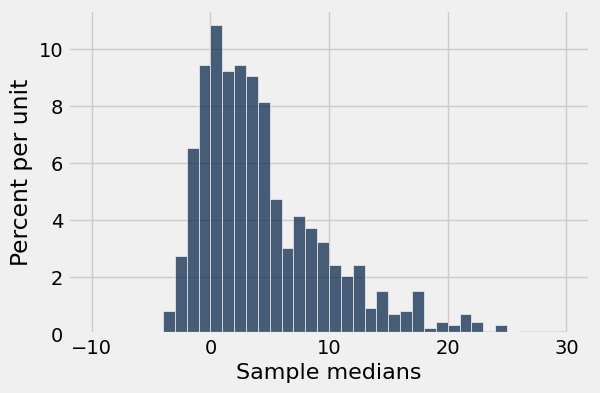

In [117]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

In [ ]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

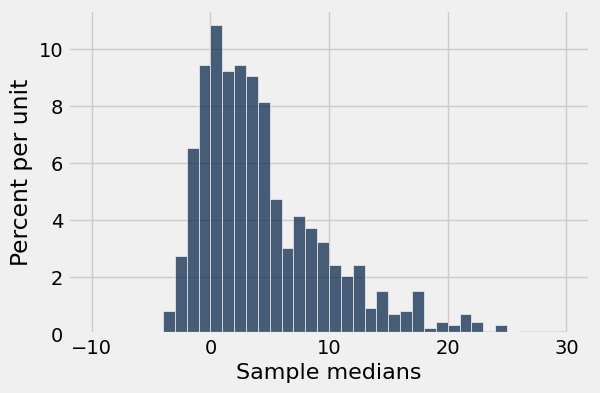

In [119]:
Table().with_column(
    'Sample medians', sample_medians).hist(bins = np.arange(-10,31,1))

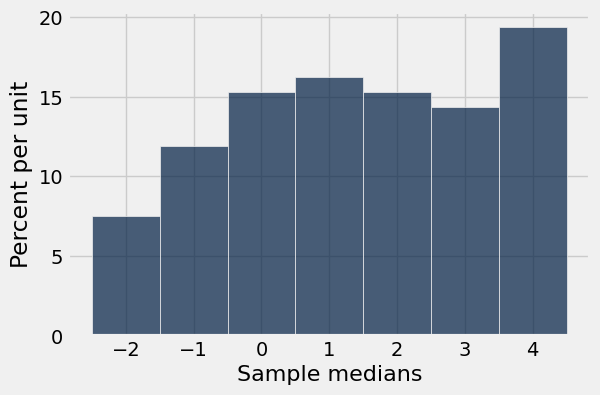

In [118]:
Table().with_column(
    'Sample medians', sample_medians).hist(bins = np.arange(-2.5,5,1))